**PROBLEM 3**

**a)**

***i***

**What is the fitted logistic regression model? Do not simply copy the results of your
code, but instead state the equation used by the model to make predictions.**

Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable(binary classification) from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success. Additionally, by using sigmoid function, Logistic regression identifies a threshold value to make a better prediciton.

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('framingham_train.csv')
train 

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,47,Some high school,1,40,0,0,0,0,221,144.0,91.0,35.78,85,66,0
1,1,48,High school/GED,1,17,0,0,0,0,218,113.0,79.0,27.33,62,73,0
2,0,59,Some high school,0,0,0,0,1,0,254,181.0,101.0,24.67,76,68,0
3,1,37,College,0,0,0,0,1,0,195,141.0,84.0,25.66,83,117,0
4,1,39,Some high school,1,40,0,0,0,0,251,115.0,77.0,24.01,65,98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0,49,High school/GED,0,0,0,0,1,0,221,136.0,90.0,28.30,100,80,0
2556,1,45,Some high school,1,20,0,0,0,0,246,111.0,72.0,21.79,75,118,0
2557,0,59,Some high school,0,0,1,0,1,0,234,181.0,107.0,39.40,80,90,1
2558,0,58,Some high school,0,0,0,0,0,0,282,143.0,76.0,27.87,79,92,0


In [3]:
train.rename(columns={'male':'Sex_male'},inplace=True)

In [4]:
train.isnull().sum()/len(train)*100

Sex_male           0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex_male         2560 non-null   int64  
 1   age              2560 non-null   int64  
 2   education        2560 non-null   object 
 3   currentSmoker    2560 non-null   int64  
 4   cigsPerDay       2560 non-null   int64  
 5   BPMeds           2560 non-null   int64  
 6   prevalentStroke  2560 non-null   int64  
 7   prevalentHyp     2560 non-null   int64  
 8   diabetes         2560 non-null   int64  
 9   totChol          2560 non-null   int64  
 10  sysBP            2560 non-null   float64
 11  diaBP            2560 non-null   float64
 12  BMI              2560 non-null   float64
 13  heartRate        2560 non-null   int64  
 14  glucose          2560 non-null   int64  
 15  TenYearCHD       2560 non-null   int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 320.1+ KB


In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex_male,2560.0,0.445703,0.497140,0.00,0.0000,0.00,1.00,1.00
age,2560.0,49.596094,8.508699,32.00,42.0000,49.00,56.00,69.00
currentSmoker,2560.0,0.483984,0.499841,0.00,0.0000,0.00,1.00,1.00
cigsPerDay,2560.0,8.795312,11.698651,0.00,0.0000,0.00,20.00,70.00
BPMeds,2560.0,0.028906,0.167576,0.00,0.0000,0.00,0.00,1.00
prevalentStroke,2560.0,0.005469,0.073763,0.00,0.0000,0.00,0.00,1.00
prevalentHyp,2560.0,0.306250,0.461025,0.00,0.0000,0.00,1.00,1.00
diabetes,2560.0,0.024219,0.153758,0.00,0.0000,0.00,0.00,1.00
totChol,2560.0,237.423047,44.958340,119.00,206.0000,234.00,264.00,600.00
sysBP,2560.0,132.255078,21.734107,83.50,117.0000,128.00,144.00,244.00


In [7]:
train.TenYearCHD.value_counts()

0    2170
1     390
Name: TenYearCHD, dtype: int64

C:\Users\MONSTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

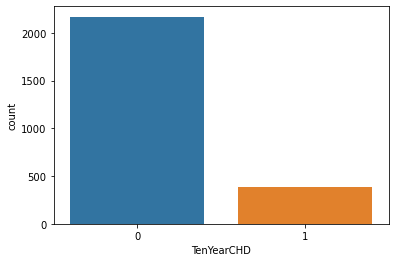

In [8]:
sns.countplot(train.TenYearCHD)
#Imbalanced Dataset

<ipython-input-9-495e3b6ca639>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  train.hist(ax = ax)


array([[<AxesSubplot:title={'center':'Sex_male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>,
        <AxesSubplot:title={'center':'cigsPerDay'}>],
       [<AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>, <AxesSubplot:>]],
      dtype=object)

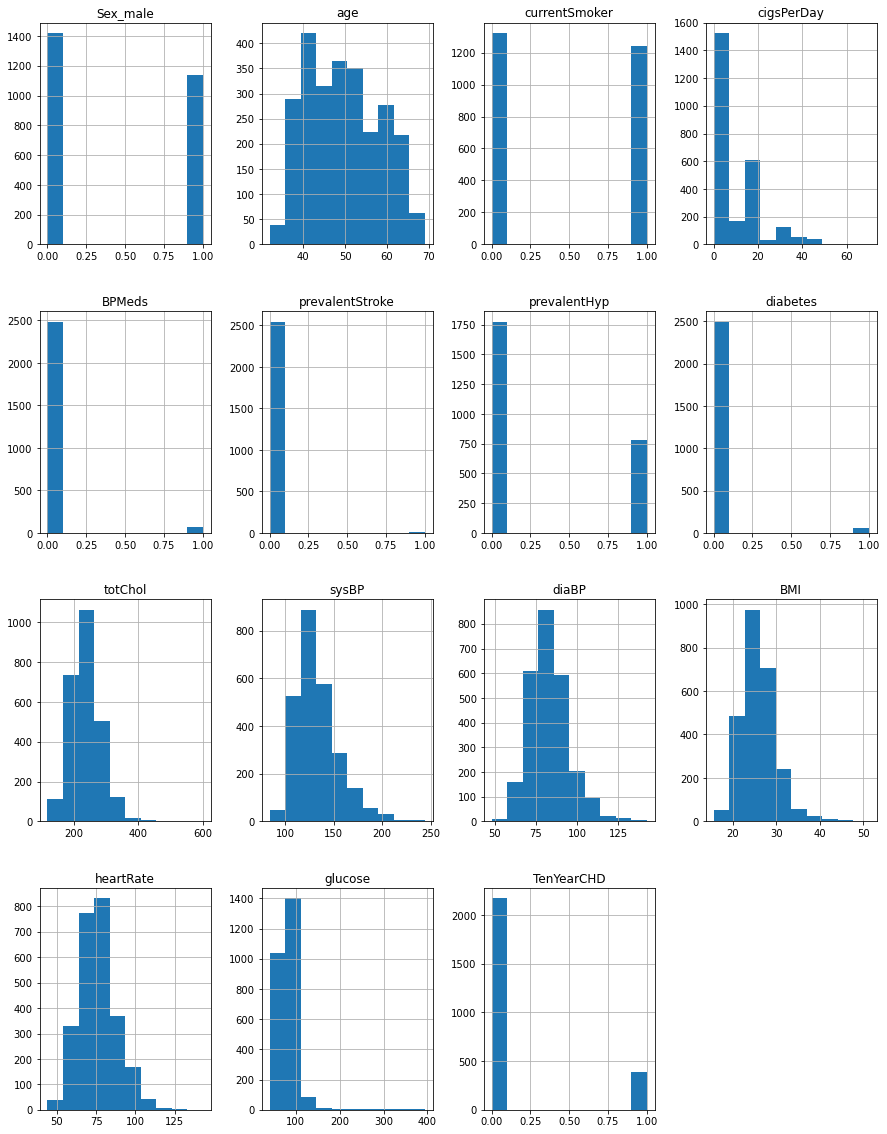

In [9]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
train.hist(ax = ax)

In [10]:
col = ['age','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

C:\Users\MONSTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


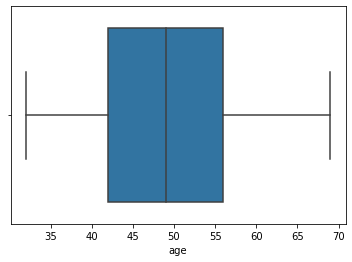

C:\Users\MONSTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


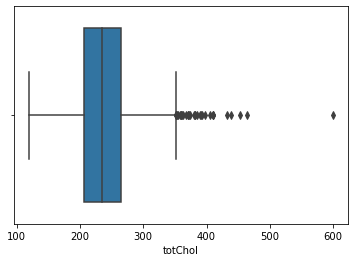

C:\Users\MONSTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


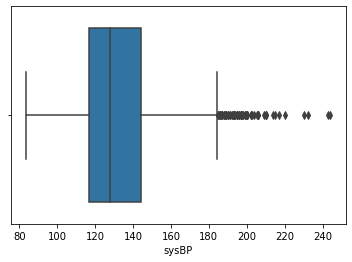

C:\Users\MONSTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


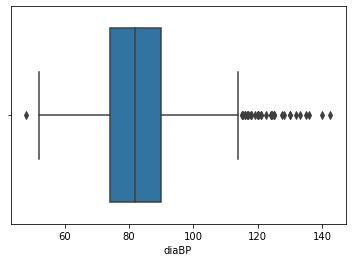

C:\Users\MONSTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


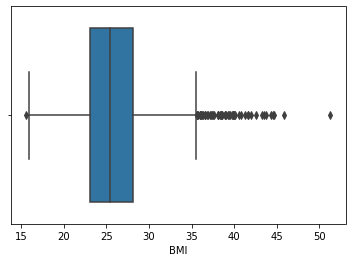

C:\Users\MONSTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


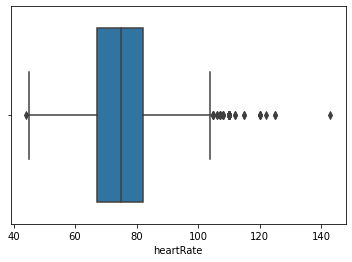

C:\Users\MONSTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


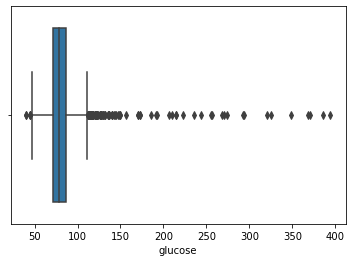

In [11]:
#OUTLIERS
for i in col:
    sns.boxplot(train[i])
    plt.show()

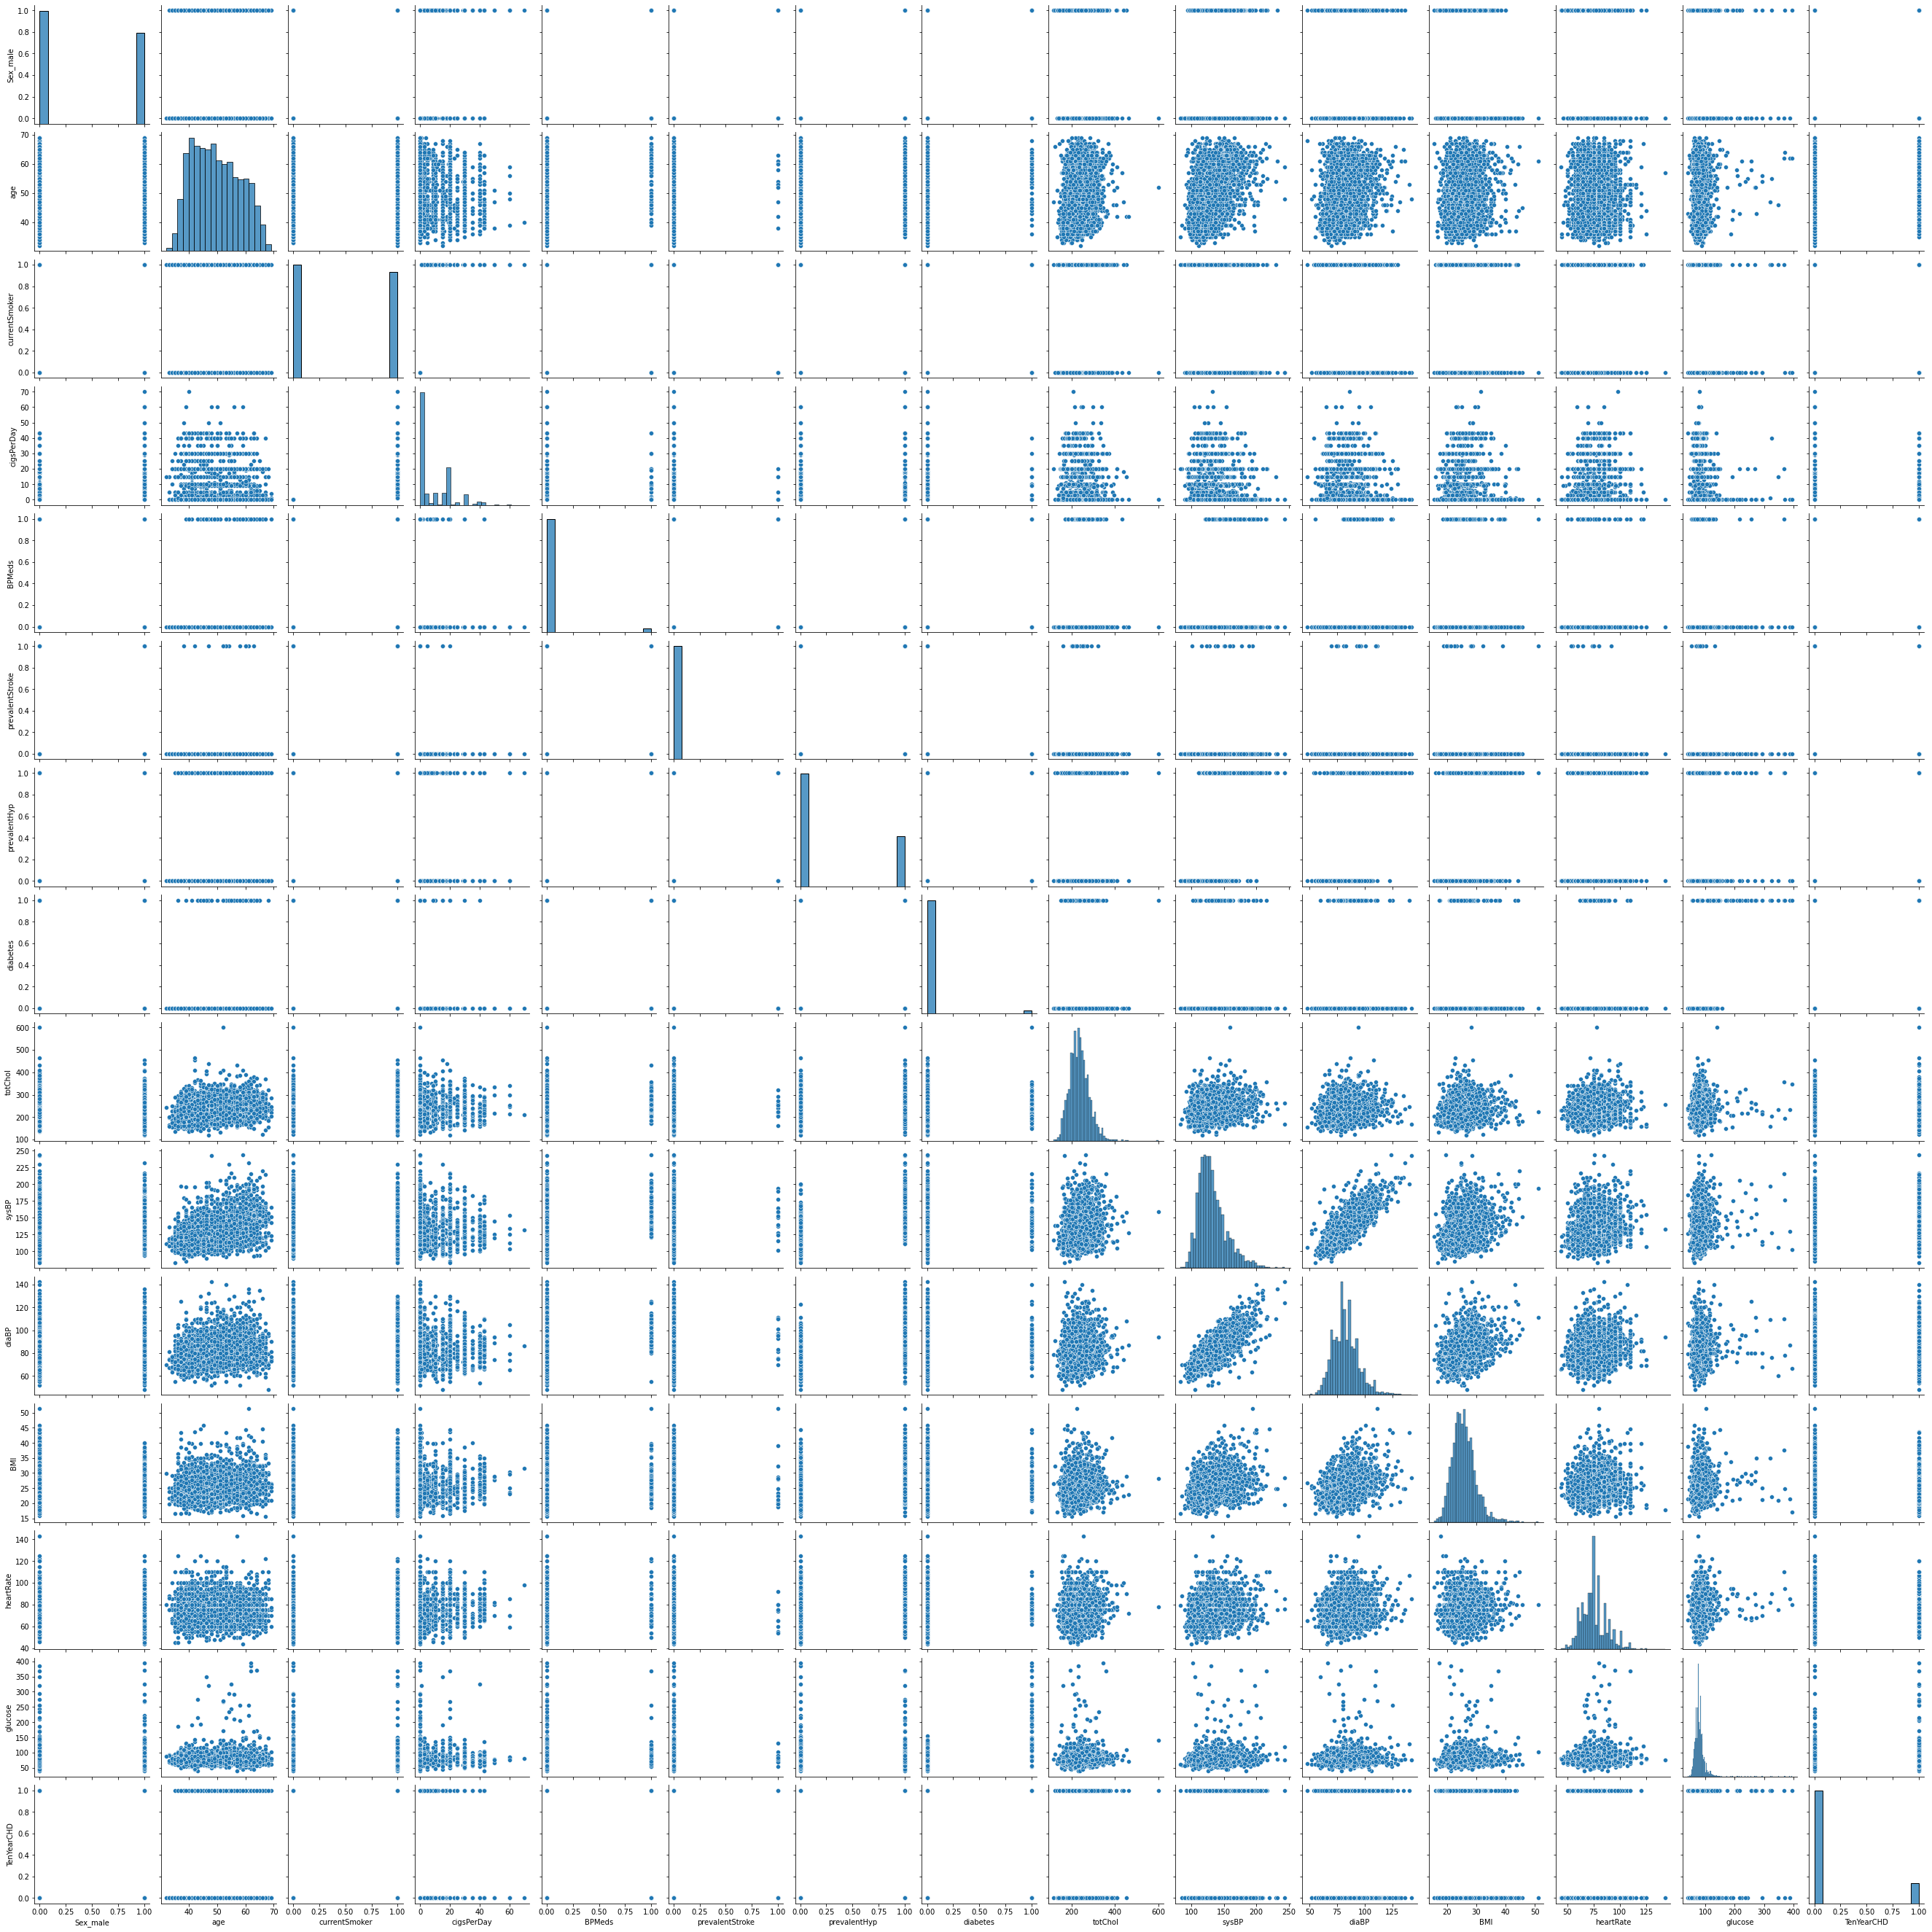

In [12]:
sns.pairplot(train)

<AxesSubplot:>

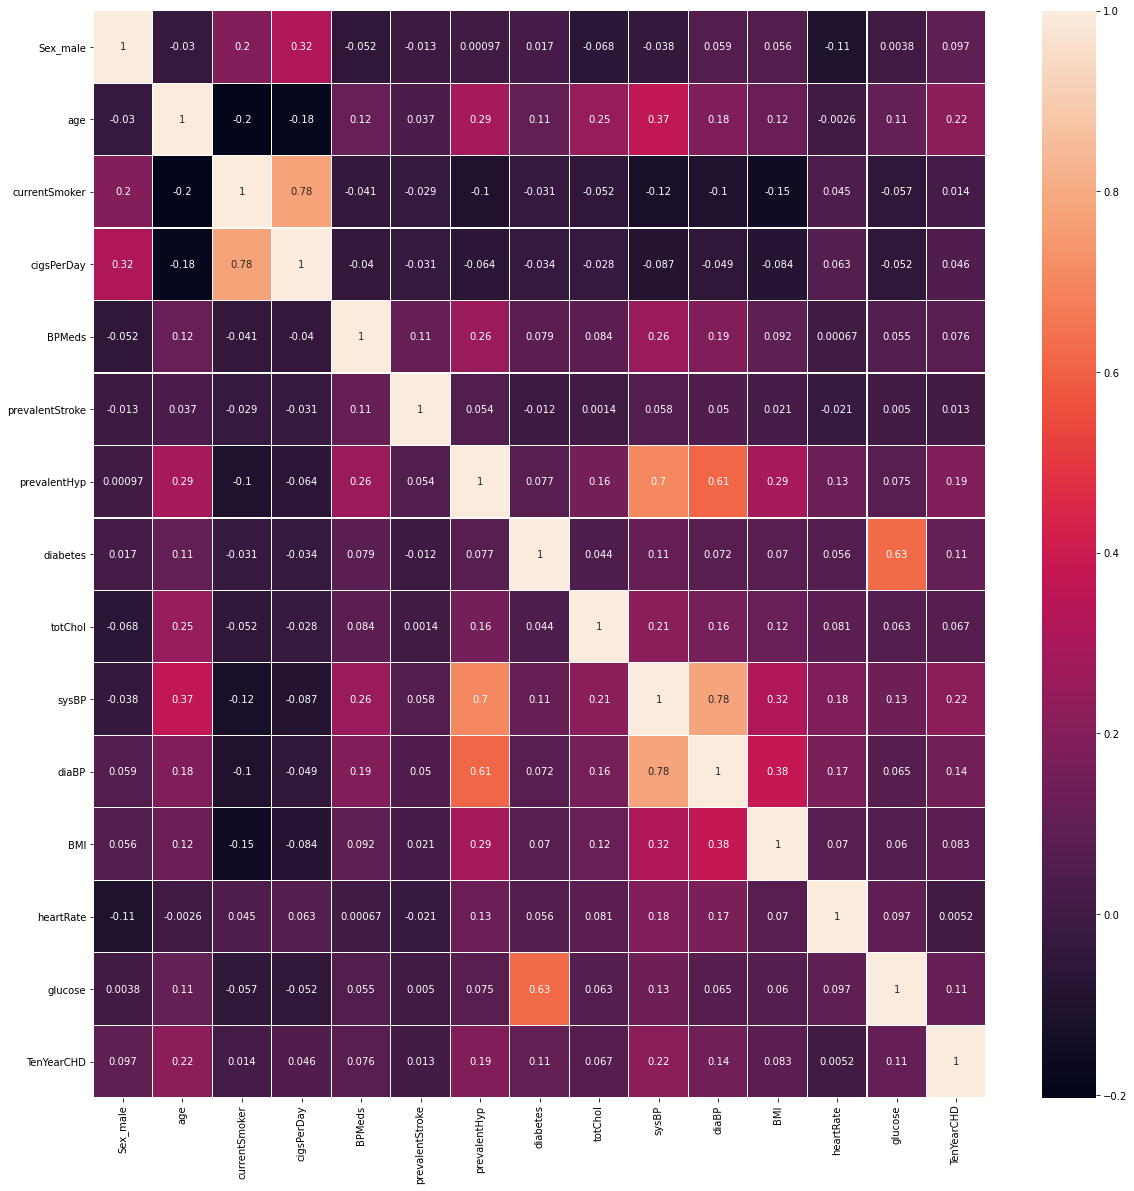

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot=True, linewidths=0.1)

**Regression**

In [14]:
from statsmodels.tools import add_constant as add_constant
heart_train_constant = add_constant(train)
heart_train_constant.head(1)

,const,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0,47,Some high school,1,40,0,0,0,0,221,144.0,91.0,35.78,85,66,0


In [15]:
heart_train_constant.education =heart_train_constant.education.map({'Some high school':0,'High school/GED':1,'College':3,'Some college/vocational school':2})
heart_train_constant.education

0       0
1       1
2       0
3       3
4       0
       ..
2555    1
2556    0
2557    0
2558    0
2559    3
Name: education, Length: 2560, dtype: int64

In [16]:
heart_train_constant.columns[:-1]

Index(['const', 'Sex_male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

***ii )***

**What are the most important risk factors for 10-year CHD risk identified by the model?
Pick one of these variables and describe its impact on a patient's predicted odds of
developing CHD in the next 10 years.**

In [17]:
import statsmodels.api as sm
import scipy.stats as st

In [18]:
st.chisqprob = lambda chisq, train: st.chi2.sf(chisq, train)
cols=heart_train_constant.columns[:-1]
model=sm.Logit(train.TenYearCHD,heart_train_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.378449
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2544
Method:                           MLE   Df Model:                           15
Date:                Sat, 27 Feb 2021   Pseudo R-squ.:                  0.1132
Time:                        11:27:55   Log-Likelihood:                -968.83
converged:                       True   LL-Null:                       -1092.5
Covariance Type:            nonrobust   LLR p-value:                 4.425e-44
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.1473      0.830     -8.610      0.000      -8.774      -5.520
Sex_male            0.5891      0.129      4.570      0.000       0.336       0.842
age                 0.0567      0.008      7.213      0.000       0.041       0.072
education          -0.1138      0.061     -1.862      0.063      -0.234       0.006
currentSmoker       0.0137      0.188      0.073      0.942      -0.355       0.383
cigsPerDay          0.0170      0.008      2.229      0.026       0.002       0.032
BPMeds              0.0538      0.291      0.185      0.853      -0.517       0.624
prevalentStroke    -0.0514      0.693     -0.074      0.941      -1.410       1.308
prevalentHyp        0.3396      0.165      2.061      0.039       0.017       0.663
diabetes            0.4307      0.387      1.113      0.266      -0.328       1.189
totChol             0.0009      0.001      0.669      0.504      -0.002       0.003
sysBP               0.0178      0.005      3.882      0.000       0.009       0.027
diaBP              -0.0096      0.007     -1.291      0.197      -0.024       0.005
BMI                 0.0121      0.015      0.796      0.426      -0.018       0.042
heartRate          -0.0071      0.005     -1.386      0.166      -0.017       0.003
glucose             0.0047      0.003      1.803      0.071      -0.000       0.010
===================================================================================
"""

The results above show some of the attributes with P value higher than the preferred alpha(5%) and thereby showing low statistically significant relationship with the probability of heart disease. Backward elemination approach is used here to remove those attributes with highest Pvalue one at a time follwed by running the regression repeatedly until all attributes have P Values less than 0.05.

**Feature Selection: Backward elemination (P-value approach)**

In [19]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(heart_train_constant,heart_train_constant.TenYearCHD,cols)

In [20]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2554
Method:                           MLE   Df Model:                            5
Date:                Sat, 27 Feb 2021   Pseudo R-squ.:                  0.1070
Time:                        11:27:55   Log-Likelihood:                -975.55
converged:                       True   LL-Null:                       -1092.5
Covariance Type:            nonrobust   LLR p-value:                 1.578e-48
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5262      0.503    -16.958      0.000      -9.512      -7.541
Sex_male       0.5902      0.125      4.719      0.000       0.345       0.835
age            0.0623      0.008      8.288      0.000       0.048       0.077
cigsPerDay     0.0163      0.005      3.243      0.001       0.006       0.026
sysBP          0.0192      0.003      7.435      0.000       0.014       0.024
glucose        0.0064      0.002      3.297      0.001       0.003       0.010
==============================================================================
"""

**Interpreting the results: Odds Ratio, Confidence Intervals and Pvalues**

In [21]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

            CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const           0.000074       0.000531    0.000198   0.000
Sex_male        1.412141       2.305580    1.804384   0.000
age             1.048693       1.080037    1.064250   0.000
cigsPerDay      1.006458       1.026448    1.016404   0.001
sysBP           1.014264       1.024602    1.019420   0.000
glucose         1.002603       1.010275    1.006432   0.001


In [22]:
conf.index

Index(['const', 'Sex_male', 'age', 'cigsPerDay', 'sysBP', 'glucose'], dtype='object')

This fitted model shows that, holding all other features constant, the odds of getting diagnosed with heart disease for males 
(sex_male = 1)over that of females (sex_male = 0) is exp(0.5902) = 1.804384. In terms of percent change, we can say that the odds for males are 83.5% higher than the odds for females.


The coefficient for age says that, holding all others constant, we will see 7% increase in the odds of getting diagnosed with CDH for a one year increase in age since exp(0.0623) = 1.064250.


Similarly , with every extra cigarette one smokes thers is a 2.6% increase in the odds of CDH.

For Total cholosterol level and glucose level there is no significant change.

There is a 1.9% increase in odds for every unit increase in systolic Blood Pressure.


**Splitting data to train and test split**

In [23]:
test = pd.read_csv('framingham_test.csv')
test.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,40,Some college/vocational school,1,5,0,0,0,0,143,125.5,80.0,21.99,71,95,0
1,0,51,Some high school,1,15,0,0,0,0,345,142.0,88.0,19.05,80,73,0
2,1,61,High school/GED,1,20,0,0,0,0,167,105.0,67.5,27.28,88,86,0
3,0,40,High school/GED,1,5,0,0,0,0,174,130.0,86.0,25.05,80,83,0
4,1,44,College,1,20,0,0,0,0,225,130.0,77.5,21.19,92,82,0


In [24]:
test.rename(columns = {'male':'Sex_male'},inplace=True)

In [25]:
test.education =test.education.map({'Some high school':0,'High school/GED':1,'College':3,'Some college/vocational school':2})
test.education

0       2
1       0
2       1
3       1
4       3
       ..
1093    0
1094    2
1095    0
1096    0
1097    0
Name: education, Length: 1098, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
test = test[['age','Sex_male','cigsPerDay','sysBP','glucose','TenYearCHD']]
new_features=train[['age','Sex_male','cigsPerDay','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
test_x = test.iloc[:,:-1]
test_y = test.iloc[:,-1]
x_train,y_train = x, y
x_test, y_test = test_x,test_y

In [28]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

**Model Evaluation**
**Model accuracy**

In [29]:
from sklearn.metrics import confusion_matrix,classification_report

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8579234972677595

In [31]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[925   6]
 [150  17]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       931
           1       0.74      0.10      0.18       167

    accuracy                           0.86      1098
   macro avg       0.80      0.55      0.55      1098
weighted avg       0.84      0.86      0.81      1098



C:\Users\MONSTER\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


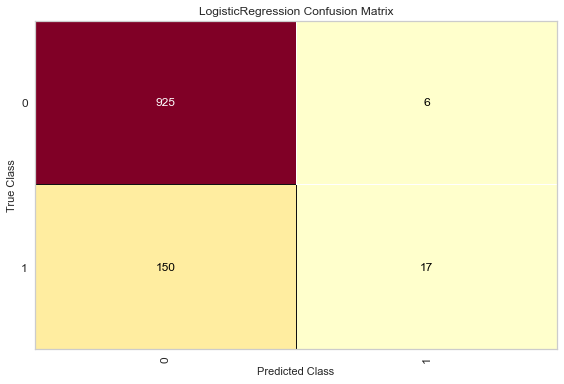

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [32]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(logreg)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(x_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(x_test, y_test)

cm.show()

The confusion matrix shows 935 + 17 = 953 correct predictions and 150+6 = 156 incorrect ones.

True Positives: 17

True Negatives: 925

False Positives: 6 (Type I error)

False Negatives: 150 ( Type II error)

In [33]:
cm=confusion_matrix(y_test,y_pred)
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

**Model Evaluation - Statistics**

In [34]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8579234972677595 
 The Missclassification = 1-Accuracy =  0.14207650273224048 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.10179640718562874 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9935553168635876 
 Positive Predictive value = TP/(TP+FP) =  0.7391304347826086 
 Negative predictive Value = TN/(TN+FN) =  0.8604651162790697 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  15.795409181636765 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9040297782812753


From the above statistics it is clear that the model is highly specific than sensitive. 
The negative values are predicted more accurately than the positives

***--------------------------------***

***iii***

***a threshold value of p is equal to 0.5***

**Predicted probabilities of 0 (No Coronary Heart Disease) and 1 ( Coronary Heart Disease: Yes) for the test data with a default classification threshold of 0.5**

In [35]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.949132,0.050868
1,0.870079,0.129921
2,0.776148,0.223852
3,0.948671,0.051329
4,0.863807,0.136193


***----------------***

***iv***

**Lower the threshold**

Since the model is predicting Heart disease too many type II errors is not advisable. A False Negative ( ignoring the probability of disease when there actualy is one) is more dangerous than a False Positive in this case. Hence inorder to increase the sensitivity, threshold can be lowered.

In [36]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity or True Positive Rate: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity True Negative Rate: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[426 505]
 [ 25 142]] 
 with 568 correct predictions and 25 Type II errors( False Negatives) 

 Sensitivity or True Positive Rate:  0.8502994011976048 Specificity True Negative Rate:  0.45757250268528465 



With 0.2 threshold the Confusion Matrix is  
 [[734 197]
 [ 76  91]] 
 with 825 correct predictions and 76 Type II errors( False Negatives) 

 Sensitivity or True Positive Rate:  0.5449101796407185 Specificity True Negative Rate:  0.7883995703544576 



With 0.3 threshold the Confusion Matrix is  
 [[852  79]
 [111  56]] 
 with 908 correct predictions and 111 Type II errors( False Negatives) 

 Sensitivity or True Positive Rate:  0.33532934131736525 Specificity True Negative Rate:  0.9151450053705693 



With 0.4 threshold the Confusion Matrix is  
 [[905  26]
 [135  32]] 
 with 937 correct predictions and 135 Type II errors( False Negatives) 

 Sensitivity or True Positive Rate:  0.19161676646706588 Specificity True Negative Rate:  0.

C:\Users\MONSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\MONSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\MONSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\MONSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.4 as keyword args. From version 0.25 passing these as positional arguments will r

***---------------***

***v***

The assumption is not reasonable. Because, after the treatment results, we are able to decide what we  will  do for the next step.

In [37]:
def cost(p_value,test_value):
    test_value = np.array(test_value)
    p_value=p_value
    y_pred_prob_yes=logreg.predict_proba(test_value)
    y_pred2=binarize(y_pred_prob_yes,p_value/10)[:,1]
    if y_pred2 < p_value:
        return f'Prescribe Medication \n {p_value} CHD risk rate cost for per person : $500,000\n {p_value/5} No CHD risk rate cost for per person  :$50,000'
    else :
        return 'Do not prescribe Medication'
        

In [38]:
print(cost(0.4, np.array(x_test.iloc[459]).reshape(1,5)))

Do not prescribe Medication


C:\Users\MONSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.04 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


***----------------***

***vi***

In [39]:
test.head()

,age,Sex_male,cigsPerDay,sysBP,glucose,TenYearCHD
0,40,0,5,125.5,95,0
1,51,0,15,142.0,73,0
2,61,1,20,105.0,86,0
3,40,0,5,130.0,83,0
4,44,1,20,130.0,82,0


In [40]:
non_CHD = test[test.TenYearCHD == 0] 
non_CHD

,age,Sex_male,cigsPerDay,sysBP,glucose,TenYearCHD
0,40,0,5,125.5,95,0
1,51,0,15,142.0,73,0
2,61,1,20,105.0,86,0
3,40,0,5,130.0,83,0
4,44,1,20,130.0,82,0
...,...,...,...,...,...,...
1093,53,1,20,130.0,75,0
1094,46,0,0,115.0,79,0
1095,64,0,0,160.0,87,0
1096,46,0,0,118.0,72,0


In [41]:
x_test_non_chd = non_CHD.drop('TenYearCHD',axis=1)
y_test_non_chd = non_CHD.TenYearCHD

In [42]:
non_chd_pred = logreg.predict(x_test_non_chd)

In [43]:
print(confusion_matrix(non_chd_pred, y_test_non_chd))

[[925   0]
 [  6   0]]


In [44]:
print('Accuracy score : ',accuracy_score(non_chd_pred, y_test_non_chd))

Accuracy score :  0.9935553168635876


<AxesSubplot:>

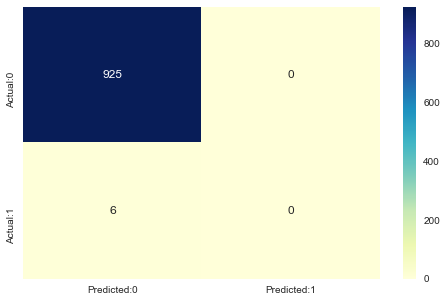

In [45]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(non_chd_pred, y_test_non_chd)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [46]:
TPR = 925 /(925+6)
print(f'True Positive Rate : {TPR}')
print(f'False Positive Rate : {1- TPR}')

True Positive Rate : 0.9935553168635876
False Positive Rate : 0.0064446831364124435


In [47]:
def non_risk_cost(p_value,test_value):
    test_value = np.array(test_value)
    p_value=p_value
    y_pred_prob_yes=logreg.predict_proba(test_value)
    y_pred2=binarize(y_pred_prob_yes,p_value/10)[:,1]
    if y_pred2 > p_value:
        return f'Do not prescribe Medication: {p_value} CHD risk rate cost for per person : $450,000 \n {p_value/5} No CHD risk rate cost for per person  :$0'
    

In [48]:
print(non_risk_cost(0.4,np.array(x_test_non_chd.iloc[65]).reshape(1,5)))

Do not prescribe Medication: 0.4 CHD risk rate cost for per person : $450,000 
 0.08 No CHD risk rate cost for per person  :$0


C:\Users\MONSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.04 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


***-------------------***

***vii***

In [49]:
x_test.head()

,age,Sex_male,cigsPerDay,sysBP,glucose
0,40,0,5,125.5,95
1,51,0,15,142.0,73
2,61,1,20,105.0,86
3,40,0,5,130.0,83
4,44,1,20,130.0,82


In [53]:
train.head(3)

,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,47,Some high school,1,40,0,0,0,0,221,144.0,91.0,35.78,85,66,0
1,1,48,High school/GED,1,17,0,0,0,0,218,113.0,79.0,27.33,62,73,0
2,0,59,Some high school,0,0,0,0,1,0,254,181.0,101.0,24.67,76,68,0


In [ ]:
#test.education.map({'Some high school':0,'High school/GED':1,'College':3,'Some college/vocational school':2})

In [57]:
new_df= pd.DataFrame.from_dict({'age':['49'],'Sex_male':[1],'cigsPerDay':[10],'BPMeds':[0],'prevalentStroke':[0],
             'prevalentHyp':[0],'diabetes':[0],'totChol':[197],'sysBP':[140.0],'diaBP':[100.0],'BMI':[35.78],
              'heartRate':[62],'glucose':[76]})
new_df

,age,Sex_male,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,49,1,10,0,0,0,0,197,140.0,100.0,35.78,62,76


In [63]:
test_col = [i for i in x_test.columns]
test_col

['age', 'Sex_male', 'cigsPerDay', 'sysBP', 'glucose']

In [65]:
new_df_col = [i for i in new_df.columns]
new_df_col

['age',
 'Sex_male',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [81]:
def new_predict(x_test, new_df,p_value):
    new_col = []
    for i in x_test.columns:
        for j in new_df.columns:
            if i == j:
                new_col.append(i)
    new_df = new_df[new_col]
    test_value = np.array(new_df)
    p_value=p_value
    y_pred_prob_yes=logreg.predict_proba(test_value)
    y_pred2=binarize(y_pred_prob_yes,p_value/10)[:,1]
    if y_pred2 < p_value:
        return f'Probability of CHD is  {logreg.predict(test_value)} so Physician should prescribe prebentive medication'
    else :
        return "Physicisian shouldn't prescribe Medication"



new_predict(x_test, new_df,0.4)
                

"Physicisian shouldn't prescribe Medication"

In [75]:
logreg.predict(new_df[test_col])

array([0], dtype=int64)

***---------------------***

***b)***

**ROC curve**

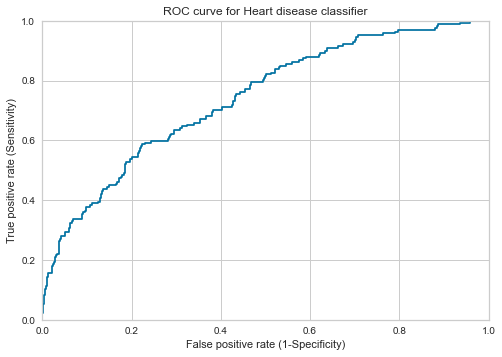

In [82]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

A common way to visualize the trade-offs of different thresholds is by using an ROC curve, a plot of the true positive rate (true positives/ total positives) versus the false positive rate ( false positives / total  negatives) for all possible choices of thresholds. A model with good classification accuracy should have significantly more true positives than false positives at all thresholds.

The optimum position for roc curve is towards the top left corner where the specificity and sensitivity are at optimum levels.

Our model is slightly far from top left corner. If we increase input data which is particularly "Target value" is 1 , ROC curve will approch top left corner. 

In [86]:
from sklearn.metrics import roc_auc_score
print('AUC score is:', roc_auc_score(y_test,y_pred_prob_yes[:,1]))

AUC score is: 0.7395048785350888


****------****

***c)***

***-------***

***d)**



- **Men seem to be more susceptible to heart disease than women.This might be ethical concern.As a feature name, we can define Gender column instead of Male column. Number of cigarettes smoked per day may occur other ethical concern. Because people aren't wanted to judge by public.However, I totally agree with data set features to analyze. Number of cigarettes smoked per day is necessary feature.**

- **All attributes selected after the elimination process show Pvalues lower than 5% and thereby suggesting significant role in the Heart disease prediction.**

- **Total cholesterol shows no significant change in the odds of CHD. This could be due to the presence of 'good cholesterol(HDL) in the total cholesterol reading.Glucose too causes a very negligible change in odds (0.2%)**

- **The model predicted with 0.86 accuracy. The model is more specific than sensitive.**

- **The Area under the ROC curve is 73.95 which is somewhat satisfactory.**

- **Overall model could be improved with more data.**